<a href="https://colab.research.google.com/github/Uemerson/time-series-forecasting-prophet-car-sales/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial - Time Series Forecasting With Prophet in Python

car sales dataset: https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv

tutorial from: https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [1]:
!pip install fbprophet

In [2]:
# import required libraries
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot

In [3]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)

In [4]:
# summarize shape
df.shape

(108, 2)

In [5]:
# show all rows
df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


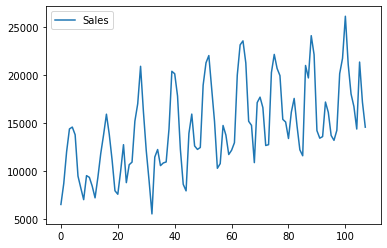

In [6]:
# plot the time series of car sales dataset
df.plot()

## Fit Prophet Model

In [7]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

# define the model
model = Prophet()

# fit the model
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Make an In-Sample Forecast

           ds          yhat    yhat_lower    yhat_upper
0  1968-01-01  14334.737769  12970.241681  15924.773689
1  1968-02-01  14905.955964  13283.668483  16504.996118
2  1968-03-01  20842.150502  19275.635344  22543.482045
3  1968-04-01  22870.095215  21270.607899  24500.358980
4  1968-05-01  24176.211162  22561.321643  25813.843916
5  1968-06-01  21057.679190  19395.856905  22686.315296
6  1968-07-01  17585.489428  16047.707356  19191.980114
7  1968-08-01  15289.261887  13716.359257  16842.505294
8  1968-09-01  13721.438281  12270.133552  15428.041974
9  1968-10-01  18133.910877  16563.249027  19727.625794
10 1968-11-01  17431.759820  15812.115386  19018.681373
11 1968-12-01  15655.287282  14113.669372  17058.038173


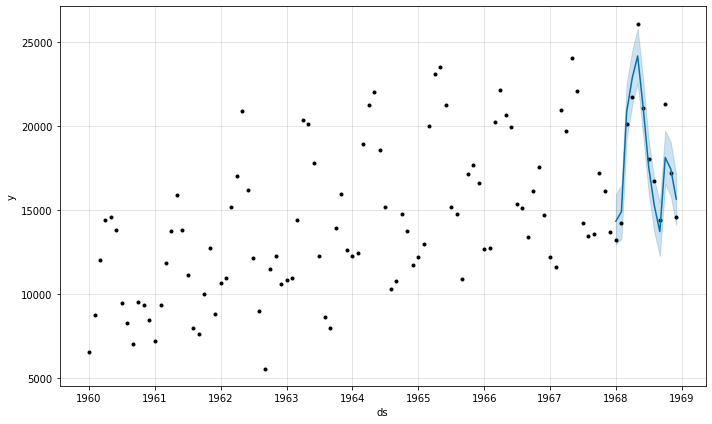

In [10]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
  date = '1968-%02d' % i
  future.append([date])

future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

# use the model to make a forecast
forecast = model.predict(future)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# plot forecast
model.plot(forecast)
pyplot.show()

## Make an Out-of-Sample Forecast

           ds          yhat    yhat_lower    yhat_upper
0  1969-01-01  15375.960093  13865.877421  16999.235290
1  1969-02-01  16142.271673  14633.815687  17749.260218
2  1969-03-01  21351.832640  19679.659904  22888.130171
3  1969-04-01  23477.889811  21854.790042  24966.418126
4  1969-05-01  24988.440907  23471.077505  26616.478783
5  1969-06-01  22249.041153  20651.541035  23717.933489
6  1969-07-01  17902.329924  16309.055442  19357.740995
7  1969-08-01  15730.201800  14068.191312  17340.029940
8  1969-09-01  14235.957070  12594.822500  15784.224483
9  1969-10-01  18671.780127  17078.962346  20282.624780
10 1969-11-01  18573.505386  16899.506601  20187.101043
11 1969-12-01  16386.033106  14778.495718  18002.451603


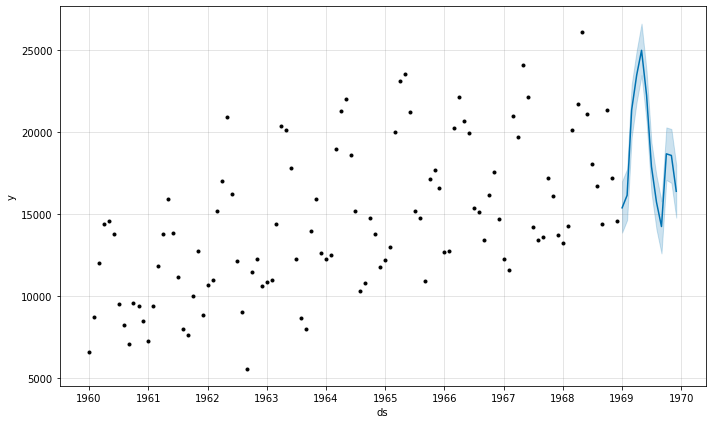

In [13]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])

future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

# use the model to make a forecast
forecast = model.predict(future)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# plot forecast
model.plot(forecast)
pyplot.show()